# Exercises XP

## Exercise 1: Understanding Data Visualization

    - Task: Explain why data visualization is important in data analysis.
    - Task: Describe the purpose of a line graph in data visualization.

Data visualization is crucial to data analysis, because, as humans, it is always easier to comprehend images than long strings of numbers or dataframes. Through graphs and visual hues, it is possible to find hidden patterns and understand complex ideas.

Line graphs are particularly helpful. They allow us to understand the relationship between the two variables being plotted, assuming that their functional correspondance is continuous. This is something particularly common in nature, so it is reasonable to assume that some variables may behave that way. Through a continuos line, we can derive information not only from the data we have but also to extrapolate to any other set of points.

## Exercise 2: Creating a Line Plot for Temperature Variation

    Objective: Create a simple line plot using Matplotlib that represents temperature variations over a week.
    Tasks:
    Use a list of temperature values for each day of the week (e.g., [72, 74, 76, 80, 82, 78, 75]).
    Label the x-axis as “Day” and the y-axis as “Temperature (°F)”.
    Add a title to the plot.
    Display the plot.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
import pandas as pd
from faker import Faker
fake = Faker()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

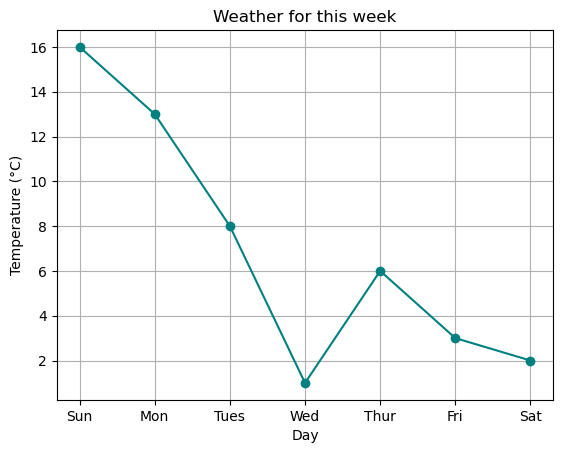

In [2]:
temp = [16,13,8,1,6,3,2]
days = ["Sun", "Mon", "Tues", "Wed", "Thur", "Fri", "Sat"]
plt.plot(days, temp, '-o', color = 'teal')
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.title("Weather for this week")
plt.show()

## Exercise 3: Visualizing Monthly Sales with a Bar Chart

    Objective: Generate a bar chart using Matplotlib to visualize monthly sales data for a retail store.
    Tasks:
    Create a list of sales values for each month (e.g., [5000, 5500, 6200, 7000, 7500]).
    Label the x-axis as “Month” and the y-axis as “Sales Amount ($)”.
    Add a title to the bar chart.
    Display the plot.

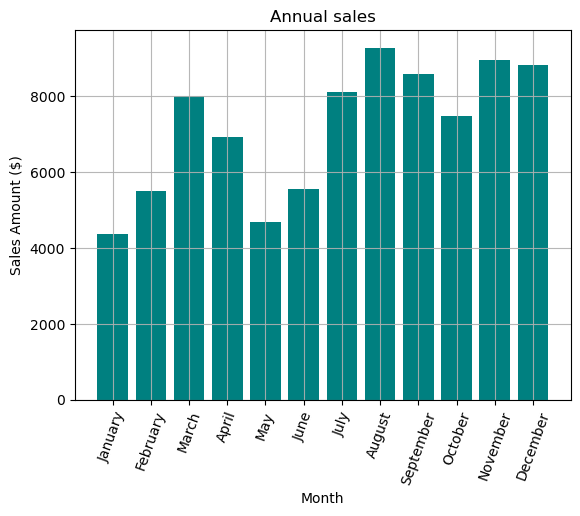

In [3]:
sales = [random.randint(4000,10000) for i in range(12)]

import calendar
months = list(calendar.month_name[1:])
plt.bar(months,sales, color = 'teal')
plt.xlabel('Month')
plt.ylabel ("Sales Amount ($)")
plt.title("Annual sales")
plt.xticks(rotation=70)
plt.grid(alpha = 0.9)
plt.show()

## Exercise 4: Visualizing the Distribution of CGPA

    Objective: Create a histogram to visualize the distribution of students’ CGPA.
    Dataset Overview: Assume the CGPA data is categorized into ranges and loaded in a DataFrame named df.
    Tasks:
    Import necessary libraries.
    Use Seaborn’s histplot to create a histogram of the CGPA categories.
    Customize the histogram with a specific color and add a title.
    Display the plot.

In [4]:
mu, sigma = 70, 20 # mean and standard deviation
students_cgpa = np.random.normal(mu, sigma, 1000)
students_cgpa = [_ for _ in students_cgpa if _<=100]
data = {"Student ID": [i for i in range(len(students_cgpa))] ,"Name": [fake.name() for _ in range(len(students_cgpa))], "CGPA": students_cgpa}
student_df = pd.DataFrame(data)
print(student_df)

     Student ID              Name       CGPA
0             0      Danny Rogers  79.126879
1             1   Jessica Burnett  30.151242
2             2      Jason Franco  77.928648
3             3    John Hernandez  70.449018
4             4     Isaac Garrett  69.388750
..          ...               ...        ...
933         933       Juan Murray  50.026684
934         934   Darrell Vazquez  70.876032
935         935       Jared Yates  61.771251
936         936  Dr. Patrick Rowe  80.683941
937         937    Casey Calderon  62.500532

[938 rows x 3 columns]


In [5]:
# Categories

def gradetocat(grade):
    categories = [chr(i).upper() for i in range(97, 97 + 6)]
    ranges = [100,90,80,70,60]
    for i, threshold in enumerate(ranges):
        if grade >= threshold:
            return categories[i-1]
    return categories[-1]

student_df['Grading'] = [gradetocat(i) for i in list(student_df['CGPA'])]
student_df.head()


,Student ID,Name,CGPA,Grading
0,0,Danny Rogers,79.126879,C
1,1,Jessica Burnett,30.151242,F
2,2,Jason Franco,77.928648,C
3,3,John Hernandez,70.449018,C
4,4,Isaac Garrett,69.388750,D


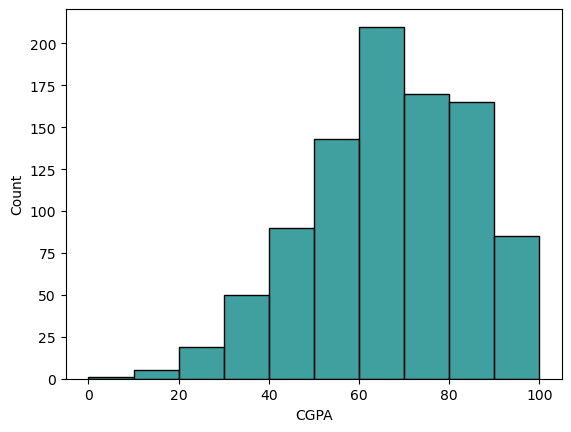

In [6]:
sns.histplot(data=student_df, x='CGPA', bins =  [i for i in range(0,110,10)], color = 'teal')
plt.show()

## Exercise 5: Comparing Anxiety Levels Across Different Genders

    Objective: Use a bar plot to compare the proportion of students experiencing anxiety across different genders.
    Dataset Overview: The dataset includes columns: ‘Do you have Anxiety?’ and ‘Choose your gender’.
    Tasks:
    Import necessary libraries.
    Use Seaborn to create a bar plot comparing anxiety levels across genders from the dataset df.
    Customize the plot with an appropriate color palette and add a title.
    Display the plot.

In [7]:
anxiety_df = {"Student ID": [_ for _ in range(1000)], "Do you have anxiety?": [random.choice(["Yes", "No"]) for _ in range(1000)], "Choose your gender": [random.choice(["M","F"]) for _ in range(1000)]}
anxiety_df = pd.DataFrame(anxiety_df)
anxiety_df.head()

,Student ID,Do you have anxiety?,Choose your gender
0,0,No,M
1,1,Yes,M
2,2,Yes,F
3,3,Yes,M
4,4,Yes,F


In [9]:
anxiety_gender_count = anxiety_df.groupby(['Choose your gender', 'Do you have anxiety?']).size().reset_index(name='Count')

print(anxiety_gender_count)


  Choose your gender Do you have anxiety?  Count
0                  F                   No    262
1                  F                  Yes    254
2                  M                   No    267
3                  M                  Yes    217


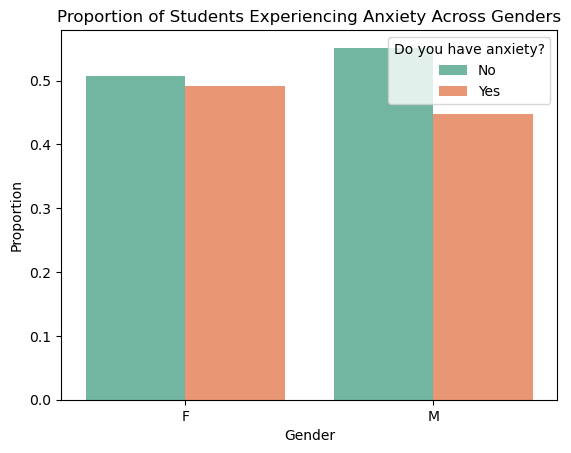

In [12]:
anxiety_gender_count['Proportion'] = anxiety_gender_count.groupby('Choose your gender')['Count'].transform(lambda x: x / x.sum())

sns.barplot(x='Choose your gender', y='Proportion', hue='Do you have anxiety?', data=anxiety_gender_count, palette='Set2')

plt.title('Proportion of Students Experiencing Anxiety Across Genders')
plt.xlabel('Gender')
plt.ylabel('Proportion')

# Display the plot
plt.show()

## Exercise 6: Exploring the Relationship Between Age and Panic Attacks

    Objective: Create a scatter plot to explore the relationship between students’ age and the occurrence of panic attacks.
    Dataset Overview: The dataset includes columns: ‘Age’ and ‘Do you have Panic Attacks?’.
    Tasks:
    Import necessary libraries.
    Convert panic attack responses to numeric values (e.g., Yes=1, No=0).
    Use Seaborn’s scatterplot to create a scatter plot with ‘Age’ on the x-axis and numeric panic attack responses on the y-axis.
    Customize the plot to improve readability by adding labels, a title, and adjusting point styles.
    Display the plot.


In [37]:
panicattacks_df = pd.DataFrame({"Age": [np.random.randint(18,27) for _ in range(1000)], "Do you have panic attacks?": [random.choice(["Yes", "No"]) for _ in range(1000)]})
panicattacks_df.head()

,Age,Do you have panic attacks?
0,25,No
1,20,Yes
2,25,Yes
3,24,No
4,18,No


In [38]:
#panicattacks_df['Do you have panic attacks?'] = le.fit_transform(panicattacks_df["Do you have panic attacks?"])
panicattacks_df.head()

,Age,Do you have panic attacks?
0,25,No
1,20,Yes
2,25,Yes
3,24,No
4,18,No


In [39]:
grouped =panicattacks_df.groupby(['Age', 'Do you have panic attacks?']).size().reset_index(name='Count')
print(grouped)

    Age Do you have panic attacks?  Count
0    18                         No     49
1    18                        Yes     43
2    19                         No     53
3    19                        Yes     60
4    20                         No     70
5    20                        Yes     55
6    21                         No     53
7    21                        Yes     68
8    22                         No     54
9    22                        Yes     69
10   23                         No     55
11   23                        Yes     46
12   24                         No     42
13   24                        Yes     56
14   25                         No     52
15   25                        Yes     56
16   26                         No     63
17   26                        Yes     56


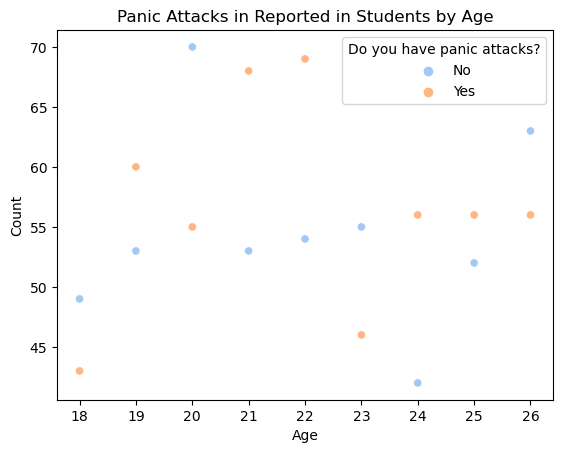

In [41]:
sns.scatterplot(x = grouped['Age'], y= grouped['Count'],hue = grouped['Do you have panic attacks?'], palette='pastel')
plt.title("Panic Attacks in Reported in Students by Age")
plt.show()